**LIBRARIES**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')

data = pd.read_csv('spam.csv', encoding='latin-1')

data = data[['v1', 'v2']]
data.columns = ['label', 'message']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PREPROCESSING**

In [11]:
def preprocess_text(text):

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


data['message'] = data['message'].apply(preprocess_text)

**Feature Extraction**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=37)
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**MODEL TRAINING**

In [13]:
# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [14]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000, solver= 'liblinear', random_state= 0)
model_lr.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [15]:
# SVM
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

**EVALUATION**

Naive Bayes Classification Report
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Accuracy: 0.9641255605381166


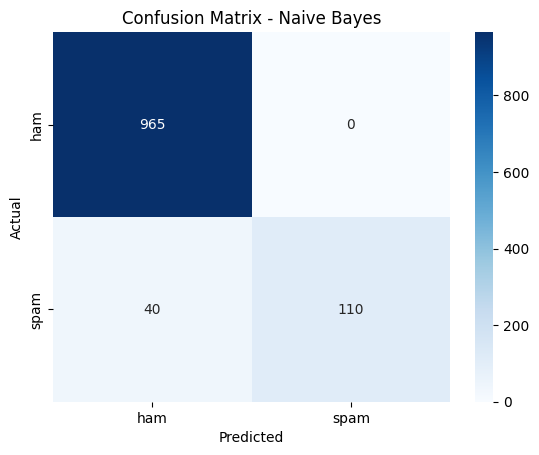

In [21]:
# Predictions and evaluation for Naive Bayes
predictions_nb = model_nb.predict(X_test_tfidf)
print("Naive Bayes Classification Report")
print(classification_report(y_test, predictions_nb))
print("Accuracy:", accuracy_score(y_test, predictions_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, predictions_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Classification Report
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       965
        spam       0.98      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Accuracy: 0.9560538116591928


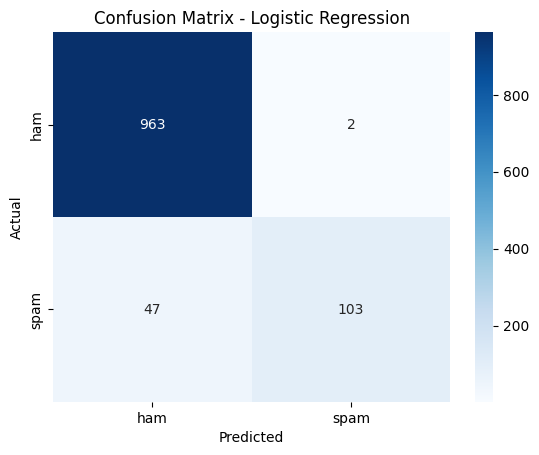

In [22]:
# Predictions and evaluation for Logistic Regression
predictions_lr = model_lr.predict(X_test_tfidf)
print("Logistic Regression Classification Report")
print(classification_report(y_test, predictions_lr))
print("Accuracy:", accuracy_score(y_test, predictions_lr))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classification Report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9829596412556054


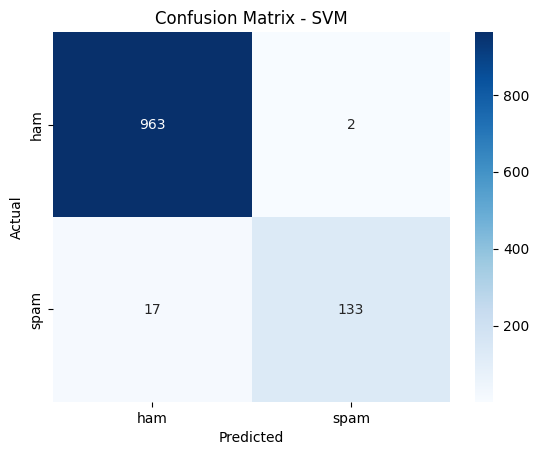

In [23]:
# Predictions and evaluation for SVM
predictions_svm = model_svm.predict(X_test_tfidf)
print("SVM Classification Report")
print(classification_report(y_test, predictions_svm))
print("Accuracy:", accuracy_score(y_test, predictions_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
